<a href="https://colab.research.google.com/github/Yogesh-sysbio/yp-practice/blob/main/air_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
air_quality = fetch_ucirepo(id=360)

# data (as pandas dataframes)
data = air_quality.data.features # Access the features data directly
# Assuming 'CO(GT)' is the target variable, extract it from the features data
y = data['CO(GT)']
X = data.drop(columns=['CO(GT)']) # Remove the target variable from the features


# metadata
print(air_quality.metadata)

# variable information
print(air_quality.variables)


{'uci_id': 360, 'name': 'Air Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/360/air+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/360/data.csv', 'abstract': 'Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer. ', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 9358, 'num_features': 15, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C59K5F', 'creators': ['Saverio Vito'], 'intro_paper': {'ID': 420, 'type': 'NATIVE', 'title': 'On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario', 'authors': 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# data (as pandas dataframes)
data = air_quality.data.features # Access the features data directly
# Assuming 'CO(GT)' is the target variable, extract it from the features data
y = data['CO(GT)']
X = data.drop(columns=['CO(GT)']) # Remove the target variable from the features

# Convert 'Date' and 'Time' to numerical representations
# We will convert them to datetime objects and then to ordinal values
X['Date'] = pd.to_datetime(X['Date'])
X['Date'] = X['Date'].apply(lambda date: date.toordinal())
X['Time'] = pd.to_datetime(X['Time']).dt.time
X['Time'] = X['Time'].apply(lambda time: time.hour * 3600 + time.minute * 60 + time.second)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2856.9388708252513
R-squared: 0.5164386525061109


<ipython-input-5-cd129e696dd7>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X['Time'] = pd.to_datetime(X['Time']).dt.time


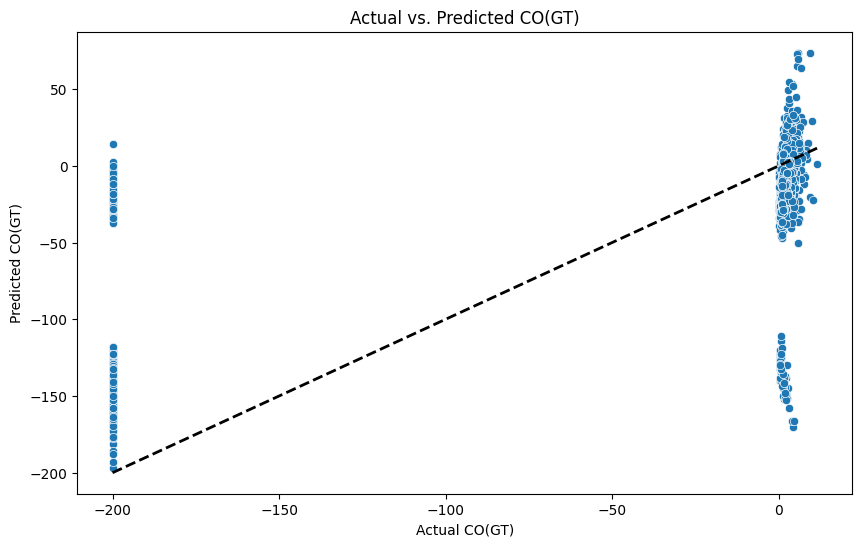

In [ ]:
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have X_test, y_test, and y_pred from your previous code

# Create a scatter plot of the actual vs. predicted values
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual CO(GT)")
plt.ylabel("Predicted CO(GT)")
plt.title("Actual vs. Predicted CO(GT)")

# Add a diagonal line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # k--: black dashed line

plt.show()

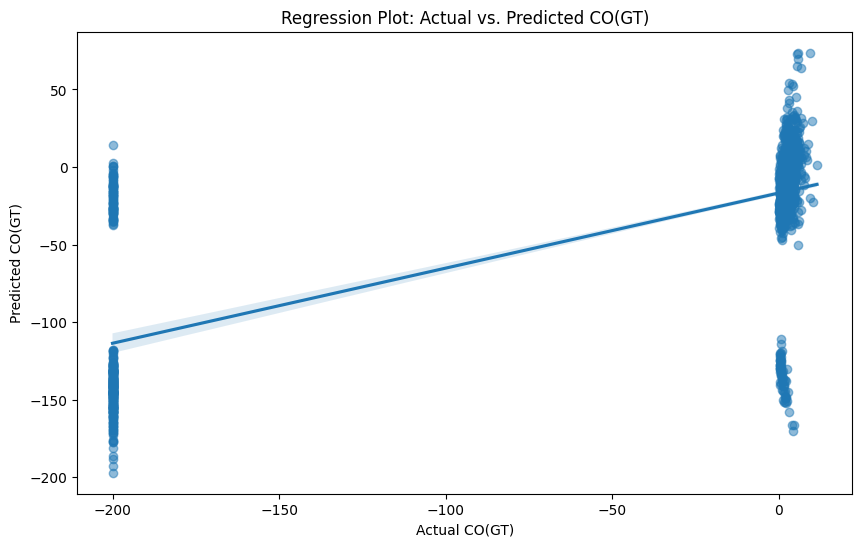

In [ ]:
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have X_test, y_test, and y_pred from your previous code

# Create a regression plot with seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5})  # scatter_kws for transparency
plt.xlabel("Actual CO(GT)")
plt.ylabel("Predicted CO(GT)")
plt.title("Regression Plot: Actual vs. Predicted CO(GT)")

plt.show()

<ipython-input-8-7c73079d64e7>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X['Time'] = pd.to_datetime(X['Time']).dt.time


Mean Squared Error: 2876.315415290625
R-squared: 0.5131590065720889


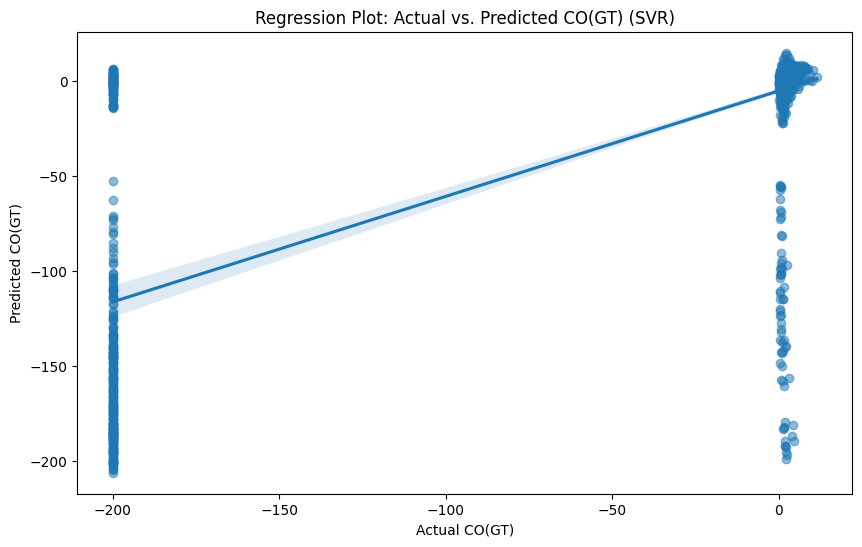

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR  # Import SVR for regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# data (as pandas dataframes)
data = air_quality.data.features # Access the features data directly
# Assuming 'CO(GT)' is the target variable, extract it from the features data
y = data['CO(GT)']
X = data.drop(columns=['CO(GT)']) # Remove the target variable from the features

# Convert 'Date' and 'Time' to numerical representations
# We will convert them to datetime objects and then to ordinal values
X['Date'] = pd.to_datetime(X['Date'])
X['Date'] = X['Date'].apply(lambda date: date.toordinal())
X['Time'] = pd.to_datetime(X['Time']).dt.time
X['Time'] = X['Time'].apply(lambda time: time.hour * 3600 + time.minute * 60 + time.second)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM Regression model (SVR)
model = SVR(kernel='rbf')  # You can experiment with different kernels like 'linear', 'poly'

# Train the model on the training data
model.fit(X_train, y_train.values.ravel()) #Added .values.ravel()

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.5})
plt.xlabel("Actual CO(GT)")
plt.ylabel("Predicted CO(GT)")
plt.title("Regression Plot: Actual vs. Predicted CO(GT) (SVR)")
plt.show()